In [1]:
import numpy as np 
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [2]:
file ='Mall_Customers.csv'
df  = pd.read_csv(file)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Edit & Clean Data
gender_cat ={'Male':1,'Female':0}
df['Gender'] = df['Gender'].map(gender_cat)
df.drop('CustomerID',axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Basic EDA

In [4]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


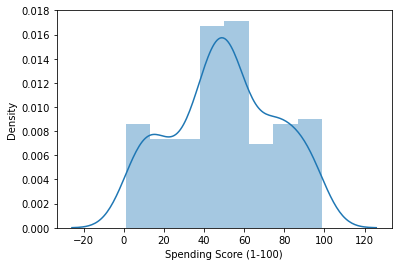

In [8]:
sns.distplot(df['Spending Score (1-100)'])
plt.show()

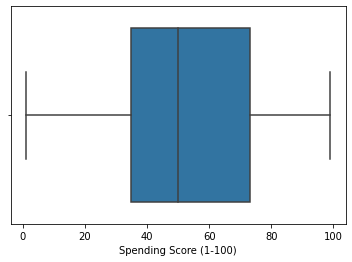

In [9]:
sns.boxplot(df['Spending Score (1-100)'])
plt.show()

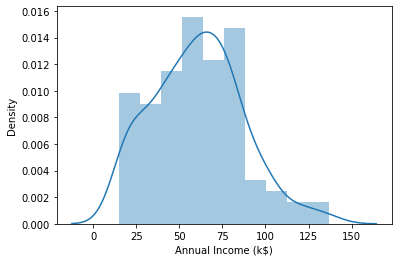

In [10]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

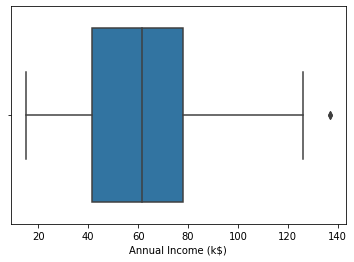

In [11]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

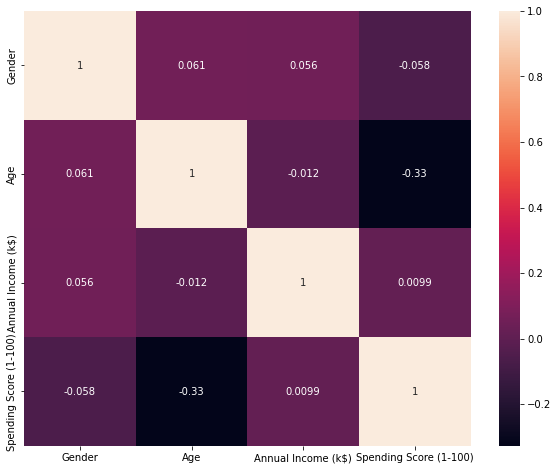

In [12]:
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True)
plt.show()

# PCA

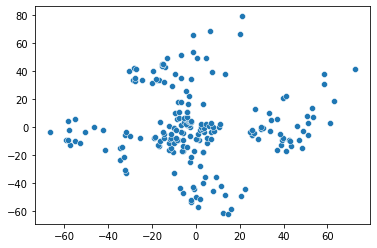

In [13]:
pca =PCA(n_components=2,random_state=42)
x_pca = pca.fit_transform(df)
# show
sns.scatterplot(x_pca[:,0],x_pca[:,1])
plt.show()

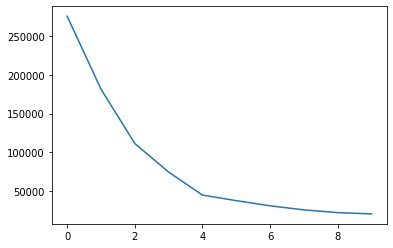

In [22]:
# GET THE BEST NUMBER OF CLUSTER USING ELBOW METHOD
inter =[]
for i in range(1,11):
    k_pca = KMeans(n_clusters=i)
    k_pca.fit_predict(x_pca)
    inter.append(k_pca.inertia_)
    
plt.plot(np.arange(10),inter)
plt.show()
# Best No . Cluster is 4

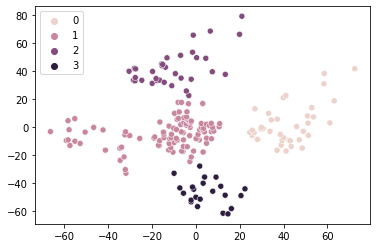

In [23]:
k_pca = KMeans(n_clusters=4)
pca_cluster = k_pca.fit_predict(x_pca)
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=pca_cluster)
plt.show()

# TSNE

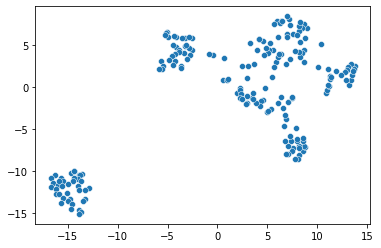

In [14]:
tsne =TSNE(n_components=2,random_state=42)
x_tsne = tsne.fit_transform(df)

#show
sns.scatterplot(x_tsne[:,0],x_tsne[:,1])
plt.show()

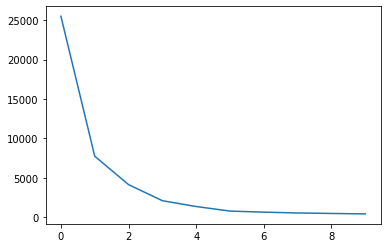

In [15]:
# GET THE BEST NUMBER OF CLUSTER USING ELBOW
inter =[]
for i in range(1,11):
    k_tsne = KMeans(n_clusters=i)
    k_tsne.fit_predict(x_tsne)
    inter.append(k_tsne.inertia_)
    
plt.plot(np.arange(10),inter)
plt.show()
# Best No . Cluster is 2

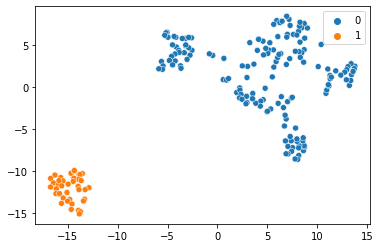

In [16]:
k_tsne = KMeans(n_clusters=2)
tsne_cluster = k_tsne.fit_predict(x_tsne)
sns.scatterplot(x_tsne[:,0],x_tsne[:,1],hue=tsne_cluster)
plt.show()

# Without Reducing Dimension

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


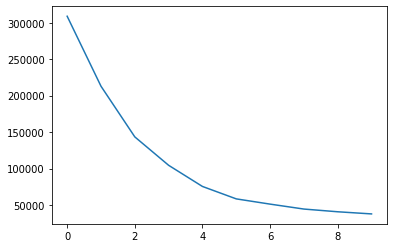

In [18]:
cri =[]
for i in range(1,11):
    k_pca = KMeans(n_clusters=i)
    k_pca.fit_predict(df)
    cri.append(k_pca.inertia_)
#     k_pca.k
    
plt.plot(np.arange(10),cri)
# best value is 4

In [19]:
k_pca = KMeans(n_clusters=4)
df_cluster_labels = k_pca.fit_predict(df)
df_cluster_labels

array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [24]:
df['cluster']      = df_cluster_labels # 4 clustere
df['tsne_cluster'] = tsne_cluster    # 2 clusters
df['pca_cluster']  = pca_cluster    # 4 clusters

In [25]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,tsne_cluster,pca_cluster
0,1,19,15,39,2,0,1
1,1,21,15,81,2,0,3
2,0,20,16,6,3,0,1
3,0,23,16,77,2,0,3
4,0,31,17,40,3,0,1
...,...,...,...,...,...,...,...
195,0,35,120,79,0,1,0
196,0,45,126,28,1,0,2
197,1,32,126,74,0,1,0
198,1,32,137,18,1,0,2


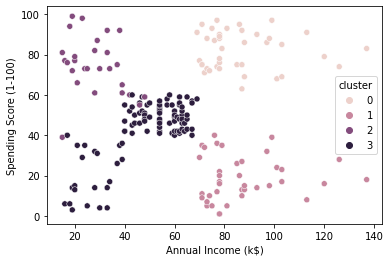

In [26]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['cluster'])
plt.show()

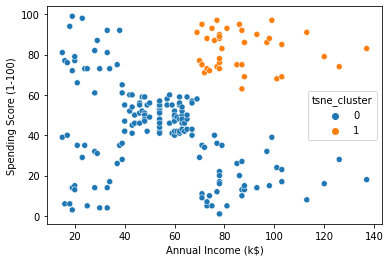

In [27]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['tsne_cluster'])
plt.show()

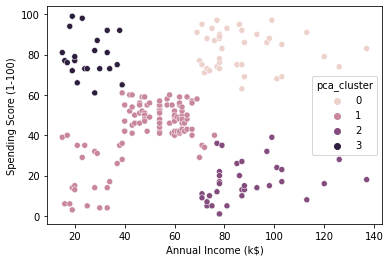

In [28]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['pca_cluster'])
plt.show()

# best clusters is 4 from pca clusters
    * cluster for high income and high spending score
    * cluster for low spending score and high income
    * cluster for low income and low or mid spending score
    * cluster for low income and high spending score